# **1. Dataset**

In [3]:
#Necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

In [4]:
#Download dataset
df = pd.read_csv("train.csv")
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# **2. Exploratory Data Analysis (EDA)**

In [7]:
#Shape of the data and data types
print(df.shape)
print(df.dtypes)

(1460, 81)
Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object


### **Conclusion**

 **1. Dataset Dimensions**
- **Total Records**: 1,460 observations (rows)
- **Total Features**: 81 variables (columns)


 **2. Data Types**

The dataset contains both numerical and categorical features:

 **Numerical Features**
- **Integer columns** (`int64`): Include features like `Id`, `MSSubClass`, `LotArea`, `MoSold`, `YrSold`, and `SalePrice`
- **Float columns** (`float64`): Include `LotFrontage`

 **Categorical Features**
- **Object columns** (`object`): Include `MSZoning`, `SaleType`, and `SaleCondition`


In [8]:
#Detailed Information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [9]:
#Data attributes, Descriptive statistics
df.describe(include='all')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
count,1460.000000,1460.000000,1460,1201.000000,1460.000000,1460,91,1460,1460,1460,...,1460.000000,7,281,54,1460.000000,1460.000000,1460.000000,1460,1460,1460.000000
unique,NaN,NaN,5,NaN,NaN,2,2,4,4,2,...,NaN,3,4,4,NaN,NaN,NaN,9,6,NaN
top,NaN,NaN,RL,NaN,NaN,Pave,Grvl,Reg,Lvl,AllPub,...,NaN,Gd,MnPrv,Shed,NaN,NaN,NaN,WD,Normal,NaN
freq,NaN,NaN,1151,NaN,NaN,1454,50,925,1311,1459,...,NaN,3,157,49,NaN,NaN,NaN,1267,1198,NaN
mean,730.500000,56.897260,NaN,70.049958,10516.828082,NaN,NaN,NaN,NaN,NaN,...,2.758904,NaN,NaN,NaN,43.489041,6.321918,2007.815753,NaN,NaN,180921.195890
std,421.610009,42.300571,NaN,24.284752,9981.264932,NaN,NaN,NaN,NaN,NaN,...,40.177307,NaN,NaN,NaN,496.123024,2.703626,1.328095,NaN,NaN,79442.502883
min,1.000000,20.000000,NaN,21.000000,1300.000000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,1.000000,2006.000000,NaN,NaN,34900.000000
25%,365.750000,20.000000,NaN,59.000000,7553.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,5.000000,2007.000000,NaN,NaN,129975.000000
50%,730.500000,50.000000,NaN,69.000000,9478.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,6.000000,2008.000000,NaN,NaN,163000.000000
75%,1095.250000,70.000000,NaN,80.000000,11601.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,8.000000,2009.000000,NaN,NaN,214000.000000


### **Conclusion**

- **High Data Sparsity (Missing Values):** There is a significant amount of missing data in specific columns. Features like `PoolQC` (only 7 non-null values), `MiscFeature` (54), and `Alley` (91) are missing for over 90% of the dataset. This suggests that specialized buildings are rare and these columns will require specific handling.
- **Low-Variance Features:** Certain features show almost no diversity. For instance, `Street` has only 2 unique values out of 1,460 entries, and same for `Utilities`. These columns provide very little predictive power and can be removed during the cleaning.
- **Significant Outliers:** There is a massive range in physical attributes. For example, `LotArea` (lot size) has a maximum value of **215,245 sq. ft.**, whereas the average is only **10,516 sq. ft.** This confirms the need to check for and potentially remove extreme outliers.

In [ ]:
#Check for Missing Values
missing = df.isna().sum().sort_values(ascending=False)
missing[missing > 0]

,0
PoolQC,1453
MiscFeature,1406
Alley,1369
Fence,1179
MasVnrType,872
FireplaceQu,690
LotFrontage,259
GarageQual,81
GarageFinish,81
GarageType,81


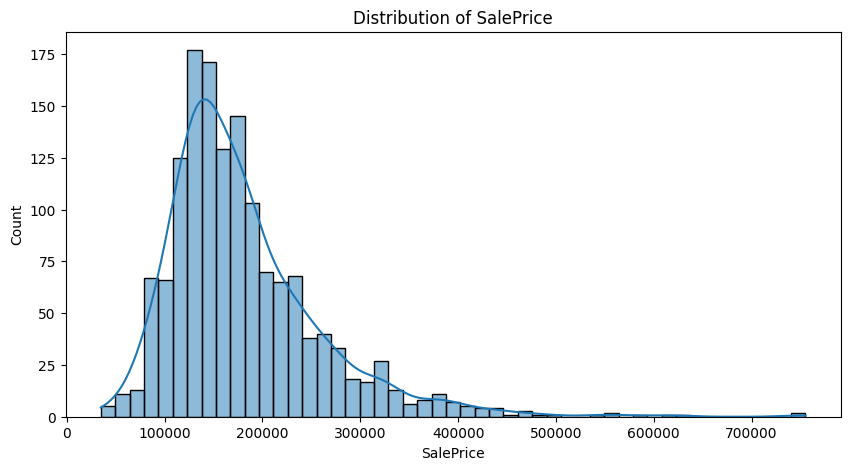

In [11]:
#Analyzing Target Variable (SalePrice)
plt.figure(figsize=(10, 5))
sns.histplot(df['SalePrice'], kde=True)
plt.title('Distribution of SalePrice')
plt.show()

### **Conclusion**

- **Visual Observation:** The histogram shows a concentration of houses in the $100k–$200k range. The distribution is not symmetrical; it has a long "right tail" extending towards higher prices ($500k+).

- **Statistical Insight:** Because of the outliers on the right, the mean price is pulled higher than the median price. This suggests that while most houses are affordable, a few high-value sales significantly impact the market average.

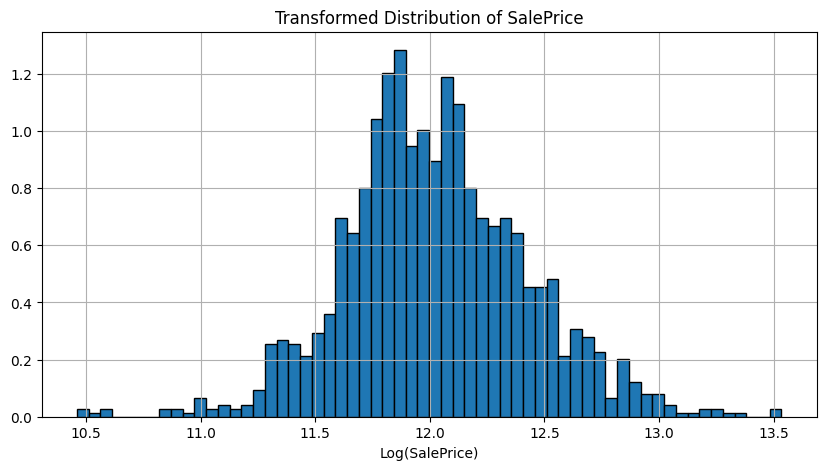

In [23]:
#Log-Transformation Analysis
plt.figure(figsize=(10, 5))
np.log(df['SalePrice']).hist(bins=60, density=True, edgecolor='black')
plt.title('Transformed Distribution of SalePrice')
plt.xlabel('Log(SalePrice)')
plt.show()

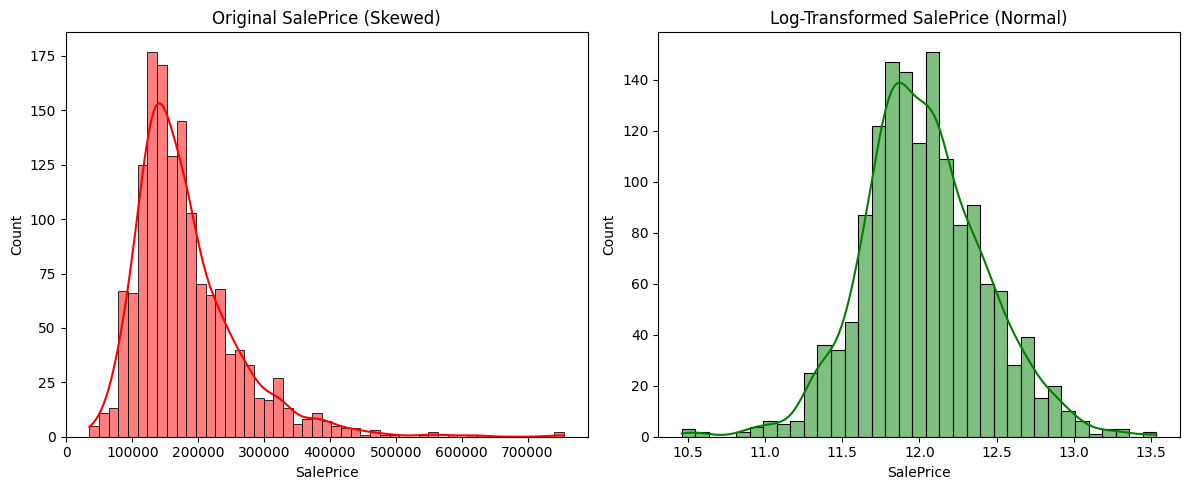

In [25]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(df['SalePrice'], kde=True, color='red')
plt.title('Original SalePrice (Skewed)')


plt.subplot(1, 2, 2)
sns.histplot(np.log(df['SalePrice']), kde=True, color='green')
plt.title('Log-Transformed SalePrice (Normal)')

plt.tight_layout()
plt.show()

### **Conclusion**
- **Visual observation:** The original SalePrice distribution was highly skewed. By applying a logarithmic transformation, the data now follows a Normal Distribution. This tranformation reduces the impact of high-end outliers.

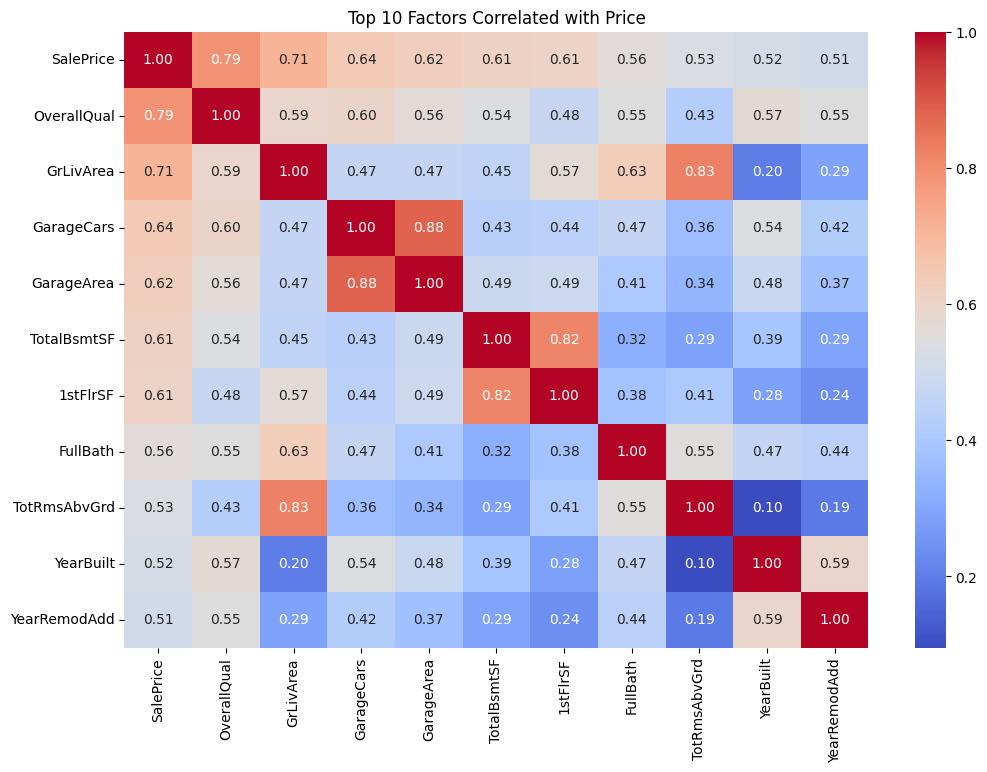

In [15]:
#Correlation Matrix (Heatmap)
plt.figure(figsize=(12, 8))
numeric_cols = df.select_dtypes(include=[np.number])
corr = numeric_cols.corr()
#Plotting top 10 features related to SalePrice
top_corr = corr['SalePrice'].sort_values(ascending=False).head(11).index
sns.heatmap(df[top_corr].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Top 10 Factors Correlated with Price')
plt.show()

### **Conclusion**

- **Primary Drivers:** The heatmap reveals that OverallQual (0.79) and GrLivArea (0.71) have the strongest linear relationship with house prices. This validates that size and quality are the most important factors.

- **Redundancy Detection:** We can observe high correlation between GarageCars and GarageArea. This means that these variables provide similar information to our future model.

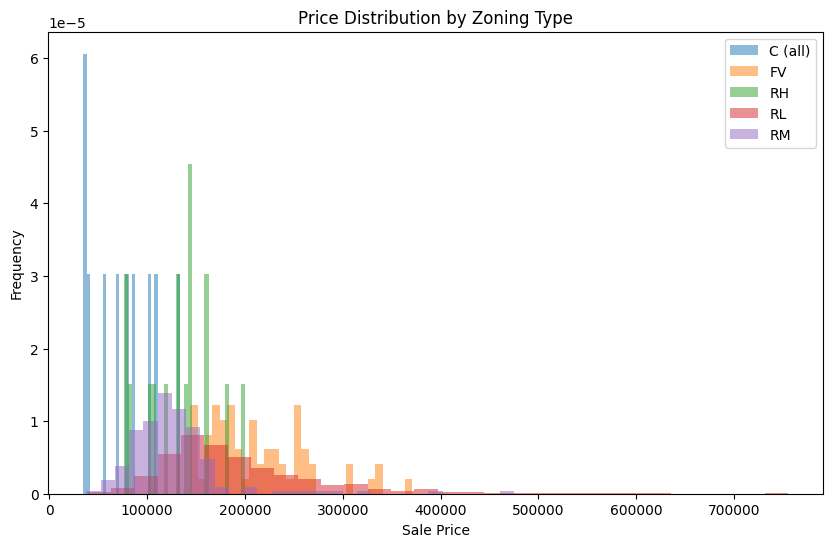

In [27]:
#Impact of Zoning on SalePrice
plt.figure(figsize=(10, 6))
df.groupby("MSZoning")["SalePrice"].plot.hist(bins=30, density=True, alpha=0.5)
plt.legend()
plt.title("Price Distribution by Zoning Type")
plt.xlabel("Sale Price")
plt.show()

### **Conclusion**
- **Visual observation:** By grouping the data by MSZoning, we can visualize how the price distribution varies across different residential areas. (RL) zones tend to have higher and more spread-out prices, while (RM) zones show lower median prices.

- **Statistical Insight:** This visualization confirms that location-based features are significant predictors of house value, as the probability density peaks at different price points for each zone.

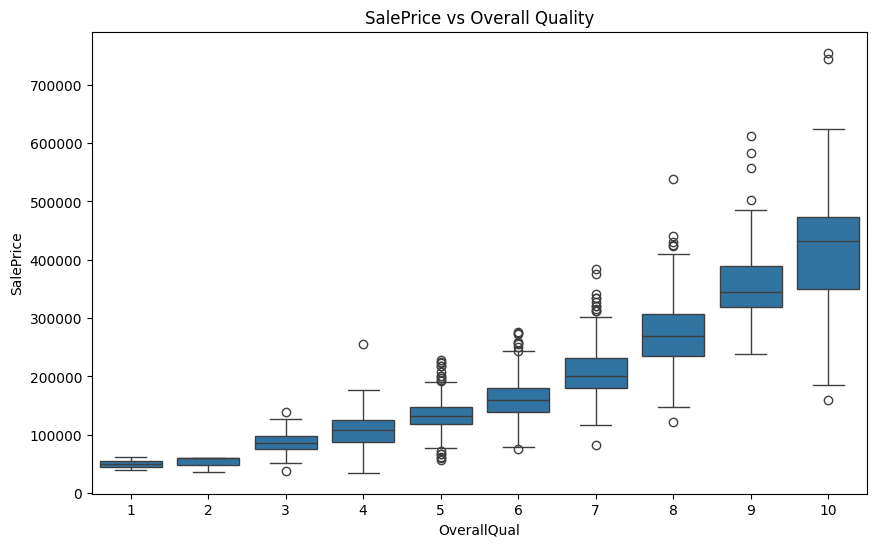

In [16]:
#Overall Quality vs Price
plt.figure(figsize=(10, 6))
sns.boxplot(x='OverallQual', y='SalePrice', data=df)
plt.title('SalePrice vs Overall Quality')
plt.show()

### **Conclusion**

- **Direct Relationship:** There is an increase in the median SalePrice as the OverallQual rating improves. This confirms that the quality of the house is a primary driver of market value.

- **Price Volatility:** We observe that for lower quality scores (1–5), prices are tightly clustered. However, for high-quality scores (8–10), the boxes become much taller, indicating significant price variance in the luxury segment.

- **Exponential Growth:** The jump in price from quality 9 to 10 is much larger than from 4 to 5, suggesting that "top-tier" quality commands a significant premium in the real estate market.

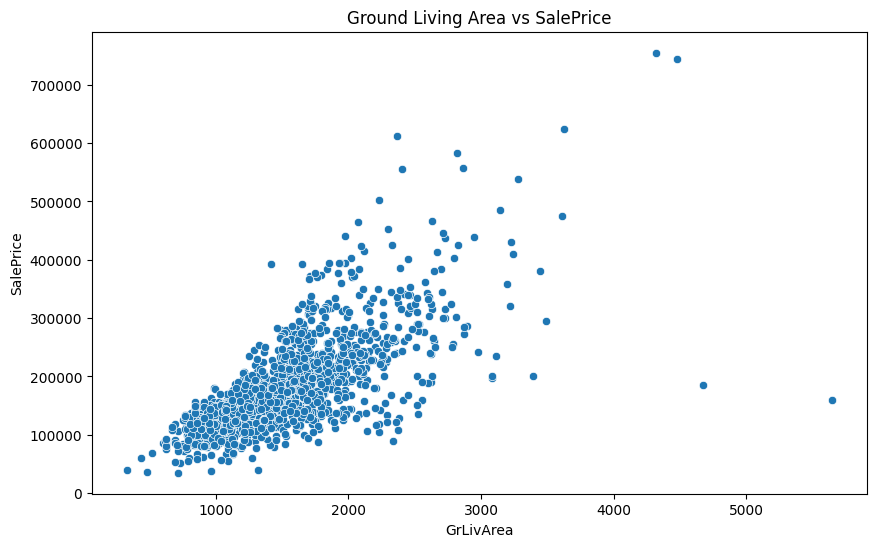

In [18]:
#Living Area vs Price
plt.figure(figsize=(10, 6))
sns.scatterplot(x='GrLivArea', y='SalePrice', data=df)
plt.title('Ground Living Area vs SalePrice')
plt.show()

### **Conclusion**

- **Linear relationship:** As the square footage increases, the price generally follows an upward trend.

- **Density and Heteroscedasticity:** We can see that the majority of houses are concentrated between 1,000 and 2,500 sq. ft. But the larger and more expensive a house is, the more its price is influenced by other factors.

- **Outliers:** The plot highlights several outliers, particularly houses with very large living areas (over 4,000 sq. ft.) that sold for unusually low prices.

/tmp/ipython-input-2557569098.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], palette='viridis', order=df[col].value_counts().index)
/tmp/ipython-input-2557569098.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], palette='viridis', order=df[col].value_counts().index)
/tmp/ipython-input-2557569098.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], palette='viridis', order=df[col].value_counts().index)
/tmp/ipython-input-2557569098.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is

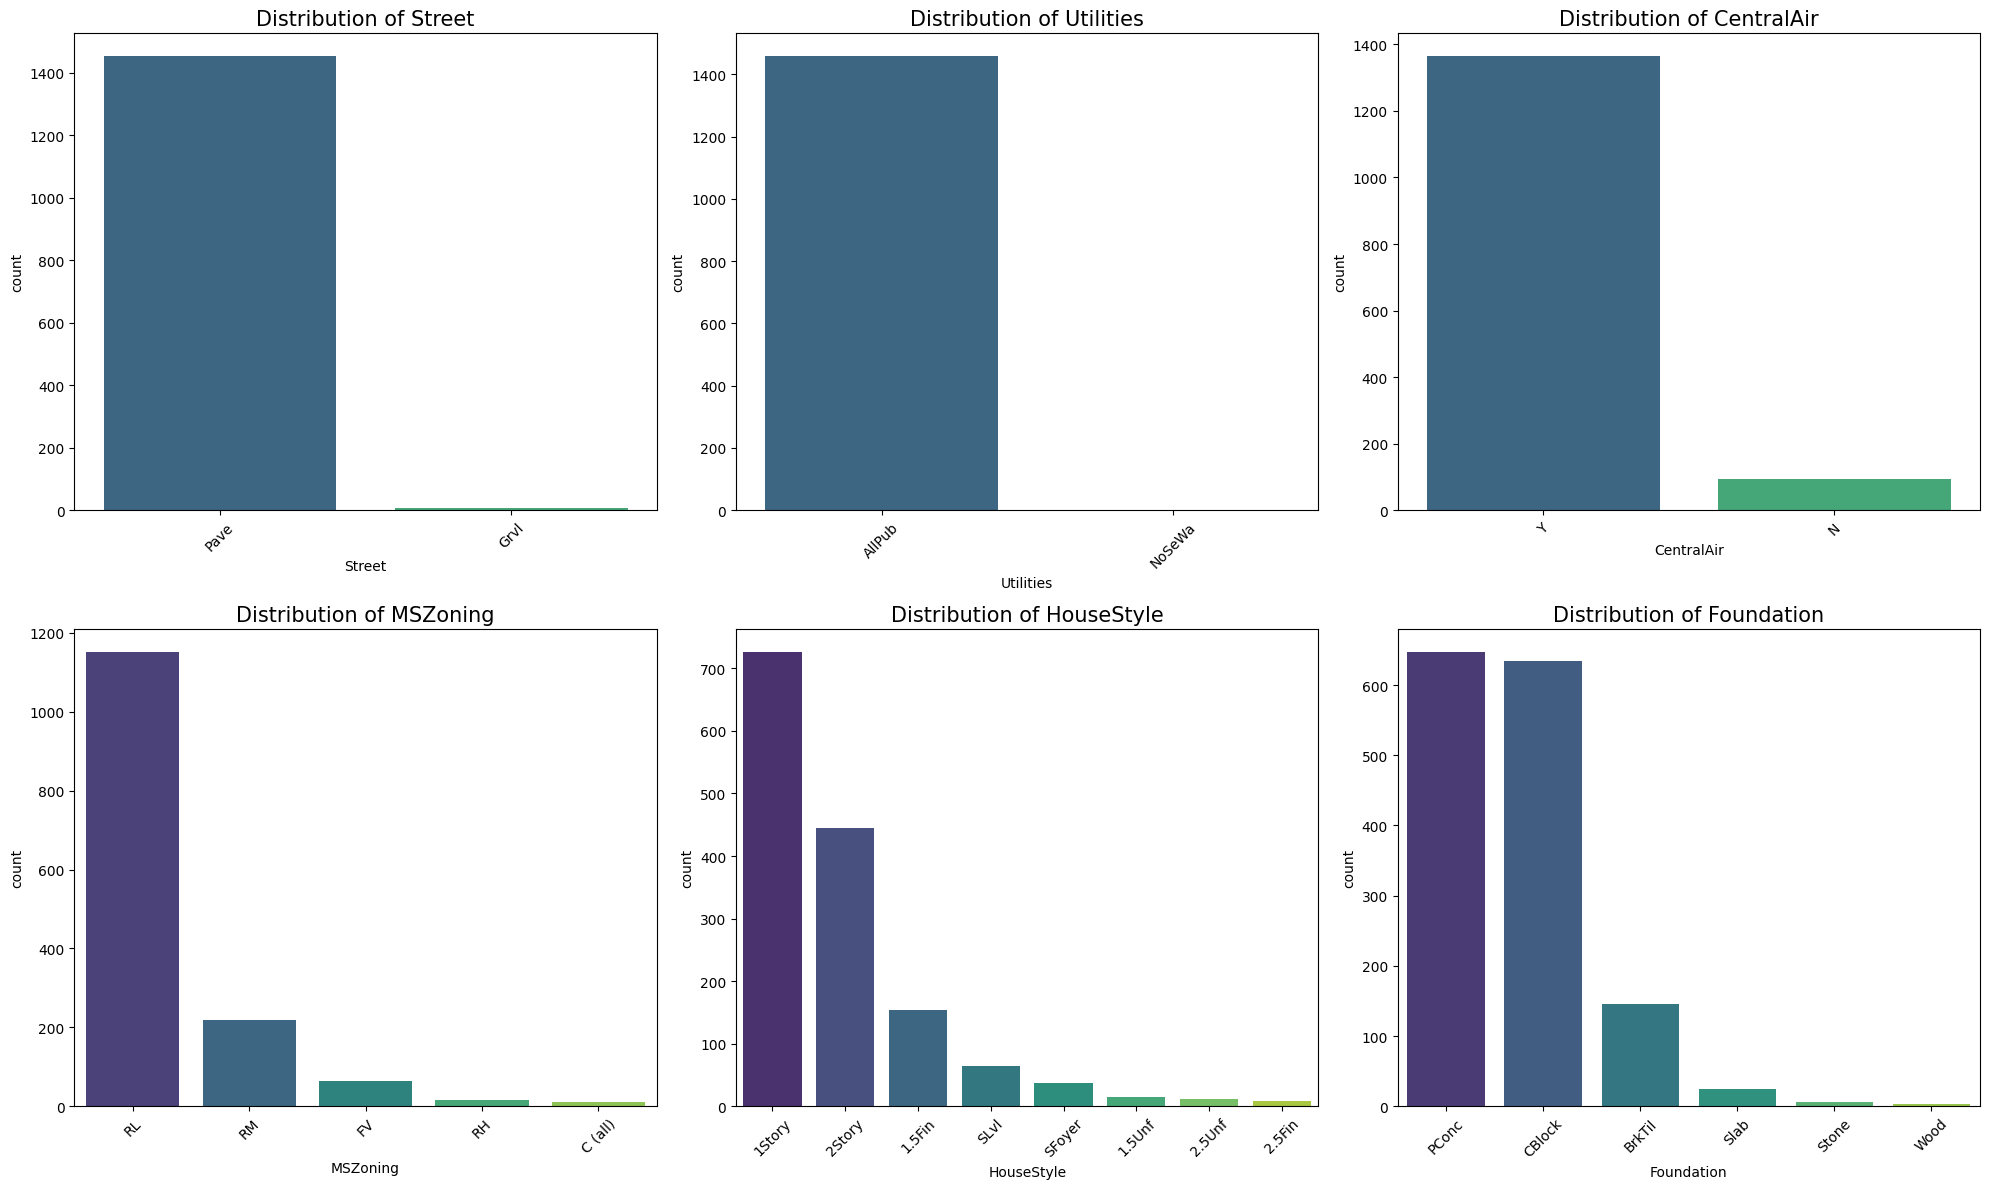

In [31]:
# Analyzing Distribution of Categorical Columns
cols_to_plot = ['Street', 'Utilities', 'CentralAir', 'MSZoning', 'HouseStyle', 'Foundation']

plt.figure(figsize=(20, 12))

for i, col in enumerate(cols_to_plot):
    plt.subplot(2, 3, i+1)
    sns.countplot(x=df[col], palette='viridis', order=df[col].value_counts().index)
    plt.title(f'Distribution of {col}', fontsize=15)
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

### **Conclusion**

- **Visual observation:** Most features show a dominant category. For example, in MSZoning, the 'RL' category is the most frequent, representing the majority of the suburban market.

- **Statistical Insight:** The lack of diversity in some columns (like Street or Utilities) suggests they may have low importance.

# **3. Data Cleaning**

In [44]:
# Handling Missing Values

# Fill numeric columns with the Mean
df.fillna(df.select_dtypes(include='number').mean(), inplace=True)
# Fill categorical columns with the Mode
df = df.fillna(df.mode().iloc[0])

In [45]:
# Removing Outliers

# Based on our Scatterplot, we observed huge houses with low prices, which are outliers.
df = df.drop(df[(df['GrLivArea'] > 4000) & (df['SalePrice'] < 300000)].index)

In [46]:
# Dropping Low-Variance Features

# EDA showed that Street and Utilities have almost the same value for all rows, so removing them reduces noise in the dataset.
df.drop(['Street', 'Utilities'], axis=1, inplace=True, errors='ignore')

In [47]:
# Final Check
print(f"Remaining missing values: {df.isna().sum().sum()}")

Remaining missing values: 0


### **Conclusion**

- **Missing Value Handling:** All remaining null values were addressed using a mean-mode strategy. The dataset is now clean, mathematically balanced, and ready for feature engineering.

- **Outlier Treatment:** Based on the scatter plot analysis, we removed houses with more than 4,000 sq ft and prices below $300k. These manual removals help the model generalize better to typical house sales.

- **Dimensionality Reduction:** Features like Street and Utilities were dropped due to near-zero variance, ensuring the model focuses on truly influential variables.



# **4. Feature Engineering**

In [50]:
# Feature transformation (Log-Transformation)

# We applied a log transformation to SalePrice to achieve a normal distribution, as confirmed during the EDA stage.
df['SalePrice'] = np.log1p(df['SalePrice'])

In [51]:
# Feature construction

# Combining areas and rooms
df["TotalSF"] = df["TotalBsmtSF"] + df["1stFlrSF"] + df["2ndFlrSF"]
df["TotalBath"] = df["FullBath"] + (0.5 * df["HalfBath"]) + df["BsmtFullBath"] + (0.5 * df["BsmtHalfBath"])
df["HouseAge"] = df["YrSold"] - df["YearBuilt"]

In [53]:
# Feature selection

# Removing redundant columns to prevent multicollinearity
cols_to_drop = ['GarageArea', '1stFlrSF', '2ndFlrSF', 'TotalBsmtSF', 'YrSold']
df.drop(columns=cols_to_drop, inplace=True, errors='ignore')

In [52]:
# Feature Extraction

# Treating the year as a category to see it as a "market period"
df['SaleYear_Cat'] = df['YrSold'].astype(str)

In [56]:
# One-Hot Encoding

# Converting text to numerical binary columns
df = pd.get_dummies(df)
df

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SaleYear_Cat_2006,SaleYear_Cat_2007,SaleYear_Cat_2008,SaleYear_Cat_2009,SaleYear_Cat_2010
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,False,False,False,True,False,False,False,True,False,False
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,False,False,False,True,False,False,True,False,False,False
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,False,False,False,True,False,False,False,True,False,False
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,False,False,False,False,False,True,False,False,False,False
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,False,False,False,True,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,6,5,1999,2000,0.0,0,...,False,False,False,True,False,False,True,False,False,False
1456,1457,20,85.0,13175,6,6,1978,1988,119.0,790,...,False,False,False,True,False,False,False,False,False,True
1457,1458,70,66.0,9042,7,9,1941,2006,0.0,275,...,False,False,False,True,False,False,False,False,False,True
1458,1459,20,68.0,9717,5,6,1950,1996,0.0,49,...,False,False,False,True,False,False,False,False,False,True


In [59]:
# Final Check
print(f"Data shape: {df.shape}")

Data shape: (1456, 287)


### **Conclusion**

- **Feature Transformation:** Applying a logarithmic transformation to the SalePrice to achieve a normal distribution, as confirmed during the EDA stage.

- **Feature Construction:** Creating new variables such as TotalS, TotalBath and HouseAge, because they are more important than individual raw features.


- **Feature Selection:** Removing the variables that were already accounted for in our newly constructed features to prevent from "double-counting" the same information.

- **Feature Extraction:** Extracting the SaleYear as a categorical string. This allows the model to treat different years as distinct market cycles rather than simple continuous numbers.

- **One-Hot Encoding:** Converting all qualitative descriptions into a numerical format. The final dataset, consisting of 287 features, provides a comprehensive mathematical representation of the housing market.

 # **5. Final Conclusion**



1. **Data Integrity & Quality:** We successfully processed the dataset by removing extreme outliers and handling missing values.

2. **Feature Transformation:** We applied transformations and created high-impact variables for our dataset .

3. **Result:** The dataset is now 100% numerical, normalized, and optimized for the machine learning phase. We have transitioned from raw, "noisy" data to a refined feature matrix ready for high-accuracy price prediction.